In [1]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np
from stateprep_qet.utils import (
    amp_to_prob,
    find_angle,
    h,
    h_hat,
    normalize,
)

NUM_QUBITS = 4  # resolution of input x
EXP_RATE = 1  # decay rate of the Gaussian

F = lambda x: np.exp(-EXP_RATE * (x**2))  # Gaussian
MIN = -2  # min x
MAX = 2  # max x

In [14]:
a3_qsvt_odd = [[(-1.1566724849392364e-14-0.1767766952966366j)], [(3.763907103050873e-16+0.005918198836511197j)], [(1.1324888718814335e-14+0.17184904242996396j)], [(-1.0883750637730997e-15-0.01747016286103164j)], [(-1.150689807465494e-14-0.1753084794237342j)], [(-2.5328098127104794e-15-0.038562604400713976j)], [(3.376183609046796e-15+0.051128447149684564j)], [(-3.374512654255854e-15-0.05298447705225422j)], [(-5.631935157974521e-15-0.08608925897179337j)], [(-3.516418248860822e-15-0.052226910115878905j)], [(-8.774549624901803e-15-0.1345452441970888j)], [(-1.0404439801787755e-14-0.1610272865558242j)], [(5.892800664837088e-16+0.008217361930794868j)], [(5.353014654839835e-15+0.08132365789527651j)], [(-4.065880404264125e-15-0.06248825115024548j)], [(-6.5360312888800956e-15-0.09905069102017858j)]]
a3_qsvt_even = [[(-3.750972901657733e-16-0.006483818110815565j)], [(-5.733817503832826e-16-0.009384367780968192j)], [(-1.4147054992343134e-15-0.018963160299697777j)], [(-2.3789983780050143e-15-0.0371471330551284j)], [(-4.336587846506711e-15-0.06505451727223446j)], [(-6.627539748377051e-15-0.10071187566753956j)], [(-8.992993815559269e-15-0.13765675635832453j)], [(-1.0829417527773477e-14-0.1660583524155591j)], [(-1.1559567376780943e-14-0.17676022610367542j)], [(-1.0773966832852467e-14-0.16604092014061853j)], [(-8.915978667010674e-15-0.1376620917677217j)], [(-6.6342144520304374e-15-0.10072238844329044j)], [(-4.3652141412969866e-15-0.06502113421056131j)], [(-2.4000518367538647e-15-0.03704434694562443j)], [(-1.025408123012845e-15-0.018637409570180473j)], [(-4.2059906464883826e-16-0.008270946842455182j)]]
a3_qsvt_odd = [x[0] for x in a3_qsvt_odd]
a3_qsvt_even = [x[0] for x in a3_qsvt_even]

1.0


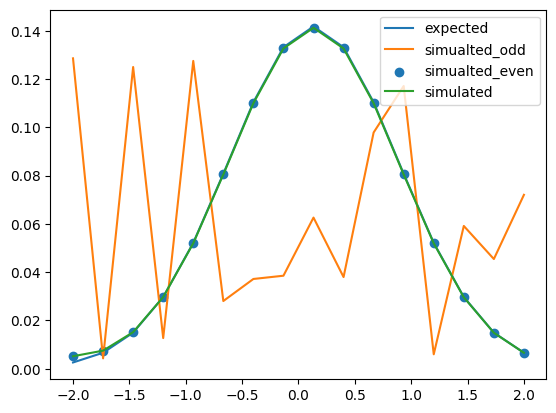

simulated prob: [0.00518 0.0075  0.01515 0.02968 0.05198 0.08047 0.10998 0.13267 0.14123
 0.13266 0.10999 0.08047 0.05195 0.0296  0.01489 0.00661]
expected prob: [0.0026  0.00663 0.01494 0.02972 0.05215 0.08078 0.11041 0.13318 0.14177
 0.13318 0.11041 0.08078 0.05215 0.02972 0.01494 0.00663]


In [ ]:
x = np.linspace(MIN, MAX, 2**NUM_QUBITS)
# simulated = [0.09472487962367022, 0.0005494248011740668, 0.0904938054334136, 0.005269005954149731, 0.10582301192061445, 0.03531685492508079, 0.06533057372402222, 0.09197744787147595, 0.1169733294799882, 0.0917191321874338, 0.11213216770708226, 0.10917571494171097, 0.013155467330462939, 0.024306277917593603, 0.013025126871953702, 0.030027779310164076]
# simulated = [0.0002547665690941403, 0.0005336921707615068, 0.0021792257637536882, 0.008362408809949443, 0.0256469490701196, 0.06146702035050962, 0.11483541813423556, 0.1671099239261562, 0.18934327689631375, 0.16707484043661586, 0.11484432007059955, 0.06147985344934408, 0.02562063409482208, 0.008316195268052783, 0.0021049989845658423, 0.00041456368058148625]
simulated = normalize([np.abs(even) for even, odd in zip(a3_qsvt_even, a3_qsvt_odd)])
print(np.sum(simulated))
expected = normalize(
    [
        (F(((MAX - MIN) * x / 2**NUM_QUBITS) + MIN))
        for x in range(2**NUM_QUBITS)
    ]
)
plt.plot(x, expected, label="expected")
plt.plot(x, normalize(np.abs(a3_qsvt_odd)), label="simualted_odd")
plt.scatter(x, normalize(np.abs(a3_qsvt_even)), label="simualted_even")
plt.plot(x, simulated, label="simulated")
plt.legend()
plt.show()

print("simulated prob:", np.round(simulated, 5))
print("expected prob:", np.round(expected, 5))

# # assert the probabilities sum to 1
# assert np.allclose(np.sum(simulated), 1)
# assert np.allclose(np.sum(expected), 1)

# # assert the probabilities are close to the ground truth
# assert np.allclose(simulated, expected, atol=1e-2)
# print("PASSED")